In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# load train and test digit dataset into these variables #hand written dataset from keras.

In [3]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [4]:
len(x_train)

60000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_train[0] # 2-D array
# 0 means black 
# and 255 means white

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

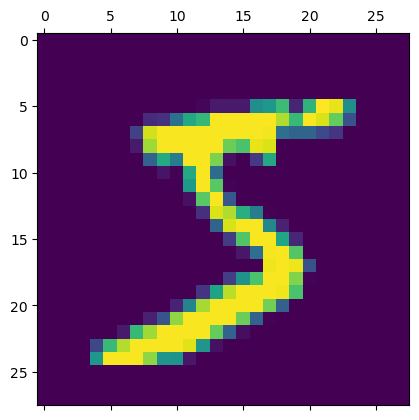

In [8]:
# printing the first trainig image
plt.matshow(x_train[0])

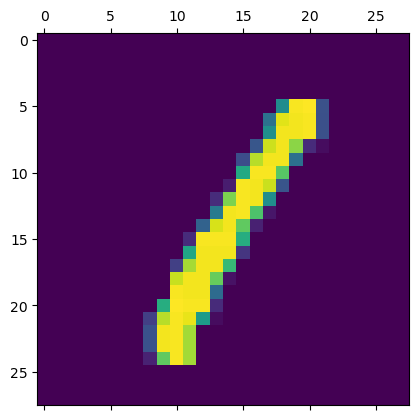

In [9]:
# printing the third trainig image
plt.matshow(x_train[3])

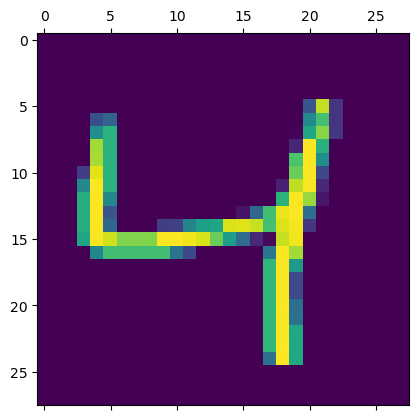

In [10]:
# printing the second trainig image
plt.matshow(x_train[2])

In [11]:
y_train[2]

4

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
#scaling
x_train=x_train/255
x_test=x_test/255

In [14]:
#flatten array 2-D to 1-D input in ann
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_train_flattened.shape

(60000, 784)

In [15]:
x_test_flattened=x_test.reshape(len(x_test),28*28)
x_test_flattened.shape

(10000, 784)

In [16]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
# Sequential means i am having a stack of layers in NN
# since stack every layer an element
# Dense means every neuron in one layer are connected to neurons in another layer
model=keras.Sequential([
    
keras.layers.Dense(10,input_shape=(784,),activation='sigmoid')
])


# compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4739 - accuracy: 0.8753
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3033 - accuracy: 0.9153
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2831 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2727 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2663 - accuracy: 0.9262


In [18]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2667 - accuracy: 0.9260


[0.2666530907154083, 0.9259999990463257]

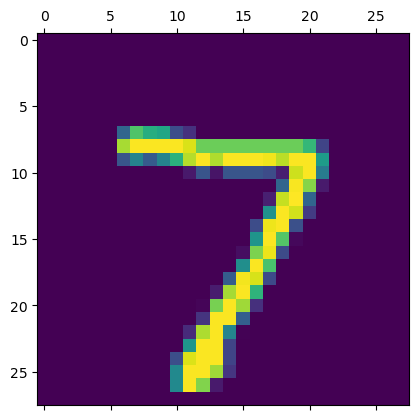

In [19]:
plt.matshow(x_test[0])

In [20]:
y_predicted=model.predict(x_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 1ms/step


array([3.2988101e-02, 3.1086827e-07, 8.0743290e-02, 9.5473295e-01,
       2.3657773e-03, 9.2745893e-02, 1.5617928e-06, 9.9983162e-01,
       1.0601164e-01, 7.1104902e-01], dtype=float32)

In [21]:
np.argmax(y_predicted[0])

7

In [22]:
y_predicted_labels=[np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [23]:
# confusion matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    2,    0,    5,    4,    2,    1,    0],
       [   0, 1113,    3,    2,    0,    2,    4,    2,    9,    0],
       [   7,    7,  933,   16,    7,    4,   13,   10,   31,    4],
       [   4,    0,   19,  918,    0,   25,    2,   12,   22,    8],
       [   1,    1,    7,    1,  909,    0,    9,    4,   10,   40],
       [   9,    3,    4,   28,   11,  780,   15,    7,   27,    8],
       [  14,    3,    8,    1,    8,   13,  906,    2,    3,    0],
       [   1,    5,   23,    4,    7,    0,    0,  959,    2,   27],
       [  12,    8,    7,   19,    9,   29,   10,   13,  859,    8],
       [  11,    6,    1,   11,   24,    8,    0,   26,    4,  918]])>

Text(95.72222222222221, 0.5, 'Truth')

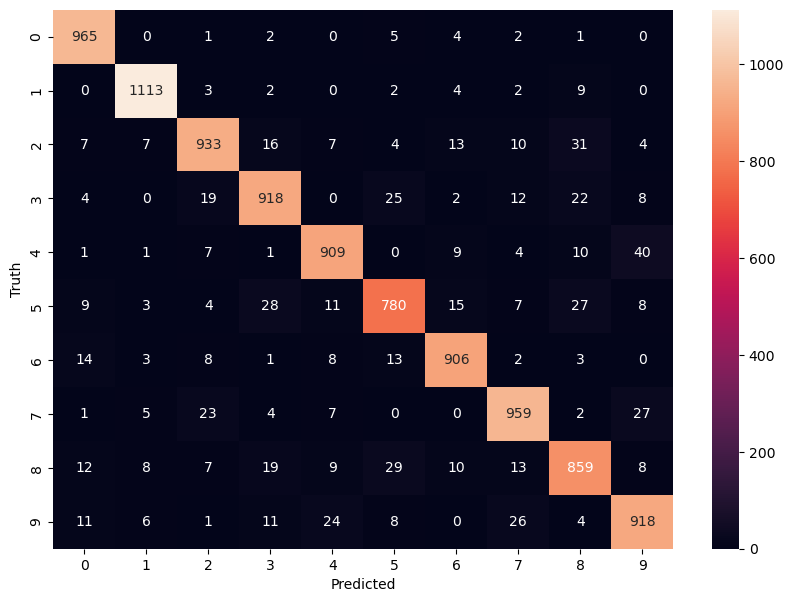

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Adding Hidden Layer

In [25]:
model=keras.Sequential([
    
keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


# compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2721 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1265 - accuracy: 0.9633
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0650 - accuracy: 0.9801
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0506 - accuracy: 0.9847


In [26]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0760 - accuracy: 0.9765


[0.07599291205406189, 0.9764999747276306]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

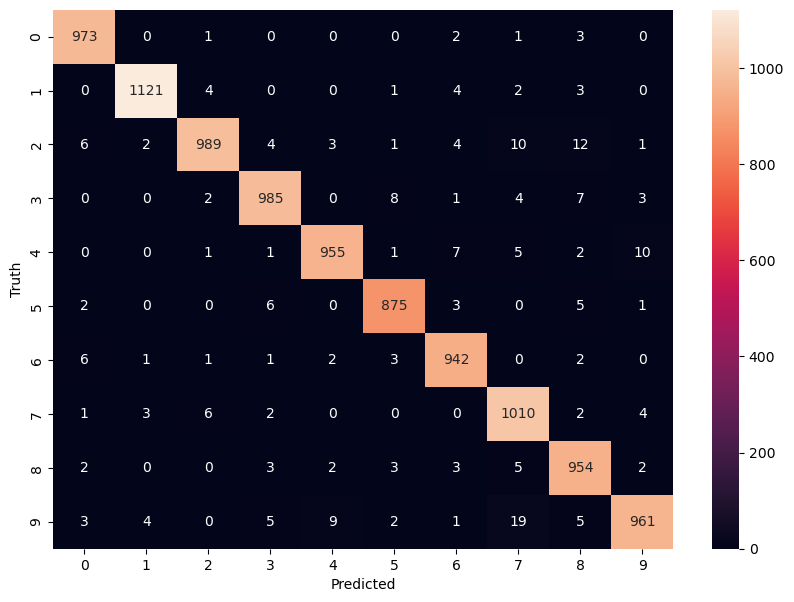

In [27]:
y_predicted=model.predict(x_test_flattened)
y_predicted_labels=[np.argmax(i) for i in y_predicted]
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Extra way

In [28]:
model=keras.Sequential([
 
keras.layers.Flatten(input_shape=(28,28)), 
keras.layers.Dense(100,input_shape=(784,),activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])


# compile
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
             )
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2684 - accuracy: 0.9227
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1200 - accuracy: 0.9642
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0841 - accuracy: 0.9751
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0642 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0497 - accuracy: 0.9849
